In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

<h2> What is Edge Detection? </h2><br>

Edge Detection is a technique which is used to segment images based on local changes in intensity levels. That means sudden change of intensity from one pixel to another might indicate that there's and edge there.

<h2> Types of Edge Models </h2>

There are basically three types of edge models:
    
<ol>
<li> Step edge model </li>
<li> Intensity ramp edge model </li>
<li> Rooftop edge model </li>
    <li> Line edge model</li>
</ol>

<h2> Step Edge Model </h2>

This is the most basic type of edge model. In this model, edge is explained as a sudden shift in intensity over the length of one pixel. Intensity shift might happen horizontally or vertically. These edges might appear in real scenarios given that we do not perform smoothing operations on the image, as it blurs out the edges by distributing or averaging neighbourhood intensities.

<b> Wow fact! :</b> Canny edge detector was originally developed to be a step edge detector.
Let's look at how we can create our own step edge. ü§©

In [ ]:
imageShape = (10, 10, 1)

def create_binary_rect(image_shape, rectangle_dimensions):
    
    image = np.zeros(image_shape, dtype = np.uint8)
    rect_image = cv2.rectangle(image, rectangle_dimensions[0], rectangle_dimensions[1], [255], -1)
    
    return rect_image

rectangle = create_binary_rect(imageShape, [(0, 0), (5, 5)])

plt.imshow(rectangle, cmap = 'gray', vmin = 0, vmax = 255)
    

<p> Here, the line at x = 5 is an edge. There is a sudden change in pixel intensity from 255 to 0. So according to step edge model, it is an edge.</p>

In [ ]:
xvals = list(range(0, 10))
yvals = rectangle[0, 0:10].squeeze()

plt.step(xvals, yvals)
plt.title("Step Edge Intensity Plot")
plt.xlabel("Pixel Number along row 0")
plt.ylabel("Intensity")
plt.show()

#kernel was overloaded so had to free memory
del rectangle

<h2> Intensity Ramp Model</h2>

Under ideal conditions, it is very hard to get step edge pattern in digital images. Loss of camera focus and noise can lead to development of a model which looks like an intensity ramp. Under such conditions, the intensity plot looks like a staircase which increases or decreases from one intensity level to another. "Slope of the ramp is inversely proportional to the degree to which the edge is blurred." Makes sense. If we don't blur the edge, angle of ramp will be 90 degrees, which means we get a step edge model (i.e the ideal model). If we blur the edge to an extremum, we will get 0 slope, which means no edge detected and it makes sense. Another demo on the way.

In [ ]:
nooflayers = 50
rampsize = 120

def create_intensity_ramp(layers, rampsize):
    accum = None
    
    for row in range(layers):
        if accum is None:
            accum = np.arange(0, rampsize, dtype = np.uint8)
            continue
        accum = np.vstack((accum, np.arange(0, rampsize, dtype = np.uint8)))
    
    accum = np.hstack((np.full((layers, 30), 0)
            ,np.hstack((accum, np.full((layers, 30), rampsize - 1)))))
    
    return accum
    

image = create_intensity_ramp(nooflayers, rampsize)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
    

In [ ]:
xvals = list(range(0, image.shape[1]))
yvals = image[0, :].squeeze()

plt.title("Intensity Ramp Model")
plt.xlabel("Pixels from first row")
plt.ylabel("Intensities")
plt.step(xvals, yvals)

del image

<p>So we can see that after one intensity level, the image intensity increases in a linear fashion and then becomes a constant intensity level. This is called ramp model of intensities.</p>

<h2> Rooftop edge model </h2>

As the name suggests, in this model, the intensity diagram looks like a rooftop. With intensity rising from low to high or vice versa and then taking a rooftop like shape.

In [ ]:
def create_rooftop_image(layers, rampsize):
    
    accum = None
    
    for row in range(layers):
        if accum is None:
            accum = np.arange(0, rampsize, dtype = np.uint8)
            continue
        accum = np.vstack((accum, np.arange(0, rampsize, dtype = np.uint8)))
    
    accum = np.hstack((np.zeros((layers, 50), dtype = np.uint8), accum))
    flipped = np.flip(accum, 1)
    accum = np.hstack((accum, flipped))
    
    return accum

img = create_rooftop_image(nooflayers, rampsize)

plt.imshow(img, cmap = 'gray')


In [ ]:
xvals = list(range(0, img.shape[1]))
yvals = img[0, :].squeeze()

plt.title("Rooftop Edge Model")
plt.xlabel("Pixels from first row")
plt.ylabel("Intensities")
plt.step(xvals, yvals)

del img

<p> I know this edge is too large, this was just to demonstrate how the ramp looks like. In reality it's waaay thinner than this.</p>

<h2> Line Edge Model </h2>

Think of this as an intensity ramp model with a constant intensity in between another intensity level.

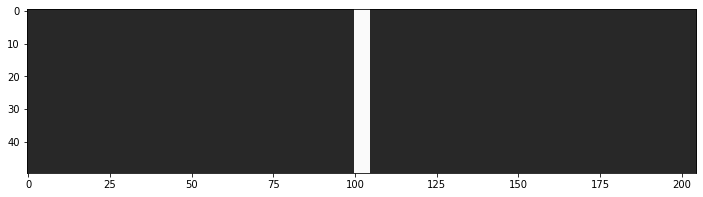

In [15]:
def create_line_edge(layers, intensity1, intensity2, col1, col2):
    accum = None
    
    for row in range(layers):
        if accum is None:
            accum = np.full((1, col1), intensity1, dtype = np.uint8)
            accum = np.hstack((accum, np.full((1, col2), intensity2, dtype = np.uint8)))
            accum = np.hstack((accum, np.full((1, col1), intensity1, dtype = np.uint8)))
            continue
        accum = np.vstack((np.copy(accum[0]), accum))    
    return accum

image = create_line_edge(50, 40, 250, 100, 5)

plt.figure(figsize = (12, 7))
plt.imshow(image, cmap = 'gray', vmin = 0 , vmax = 255)


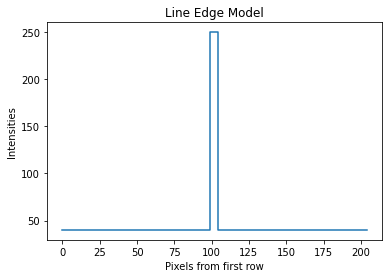

In [16]:
xvals = list(range(0, image.shape[1]))
yvals = image[0, :].squeeze()

plt.title("Line Edge Model")
plt.xlabel("Pixels from first row")
plt.ylabel("Intensities")
plt.step(xvals, yvals)

del image

<h2> Derivatives of the intensity ramp </h2>

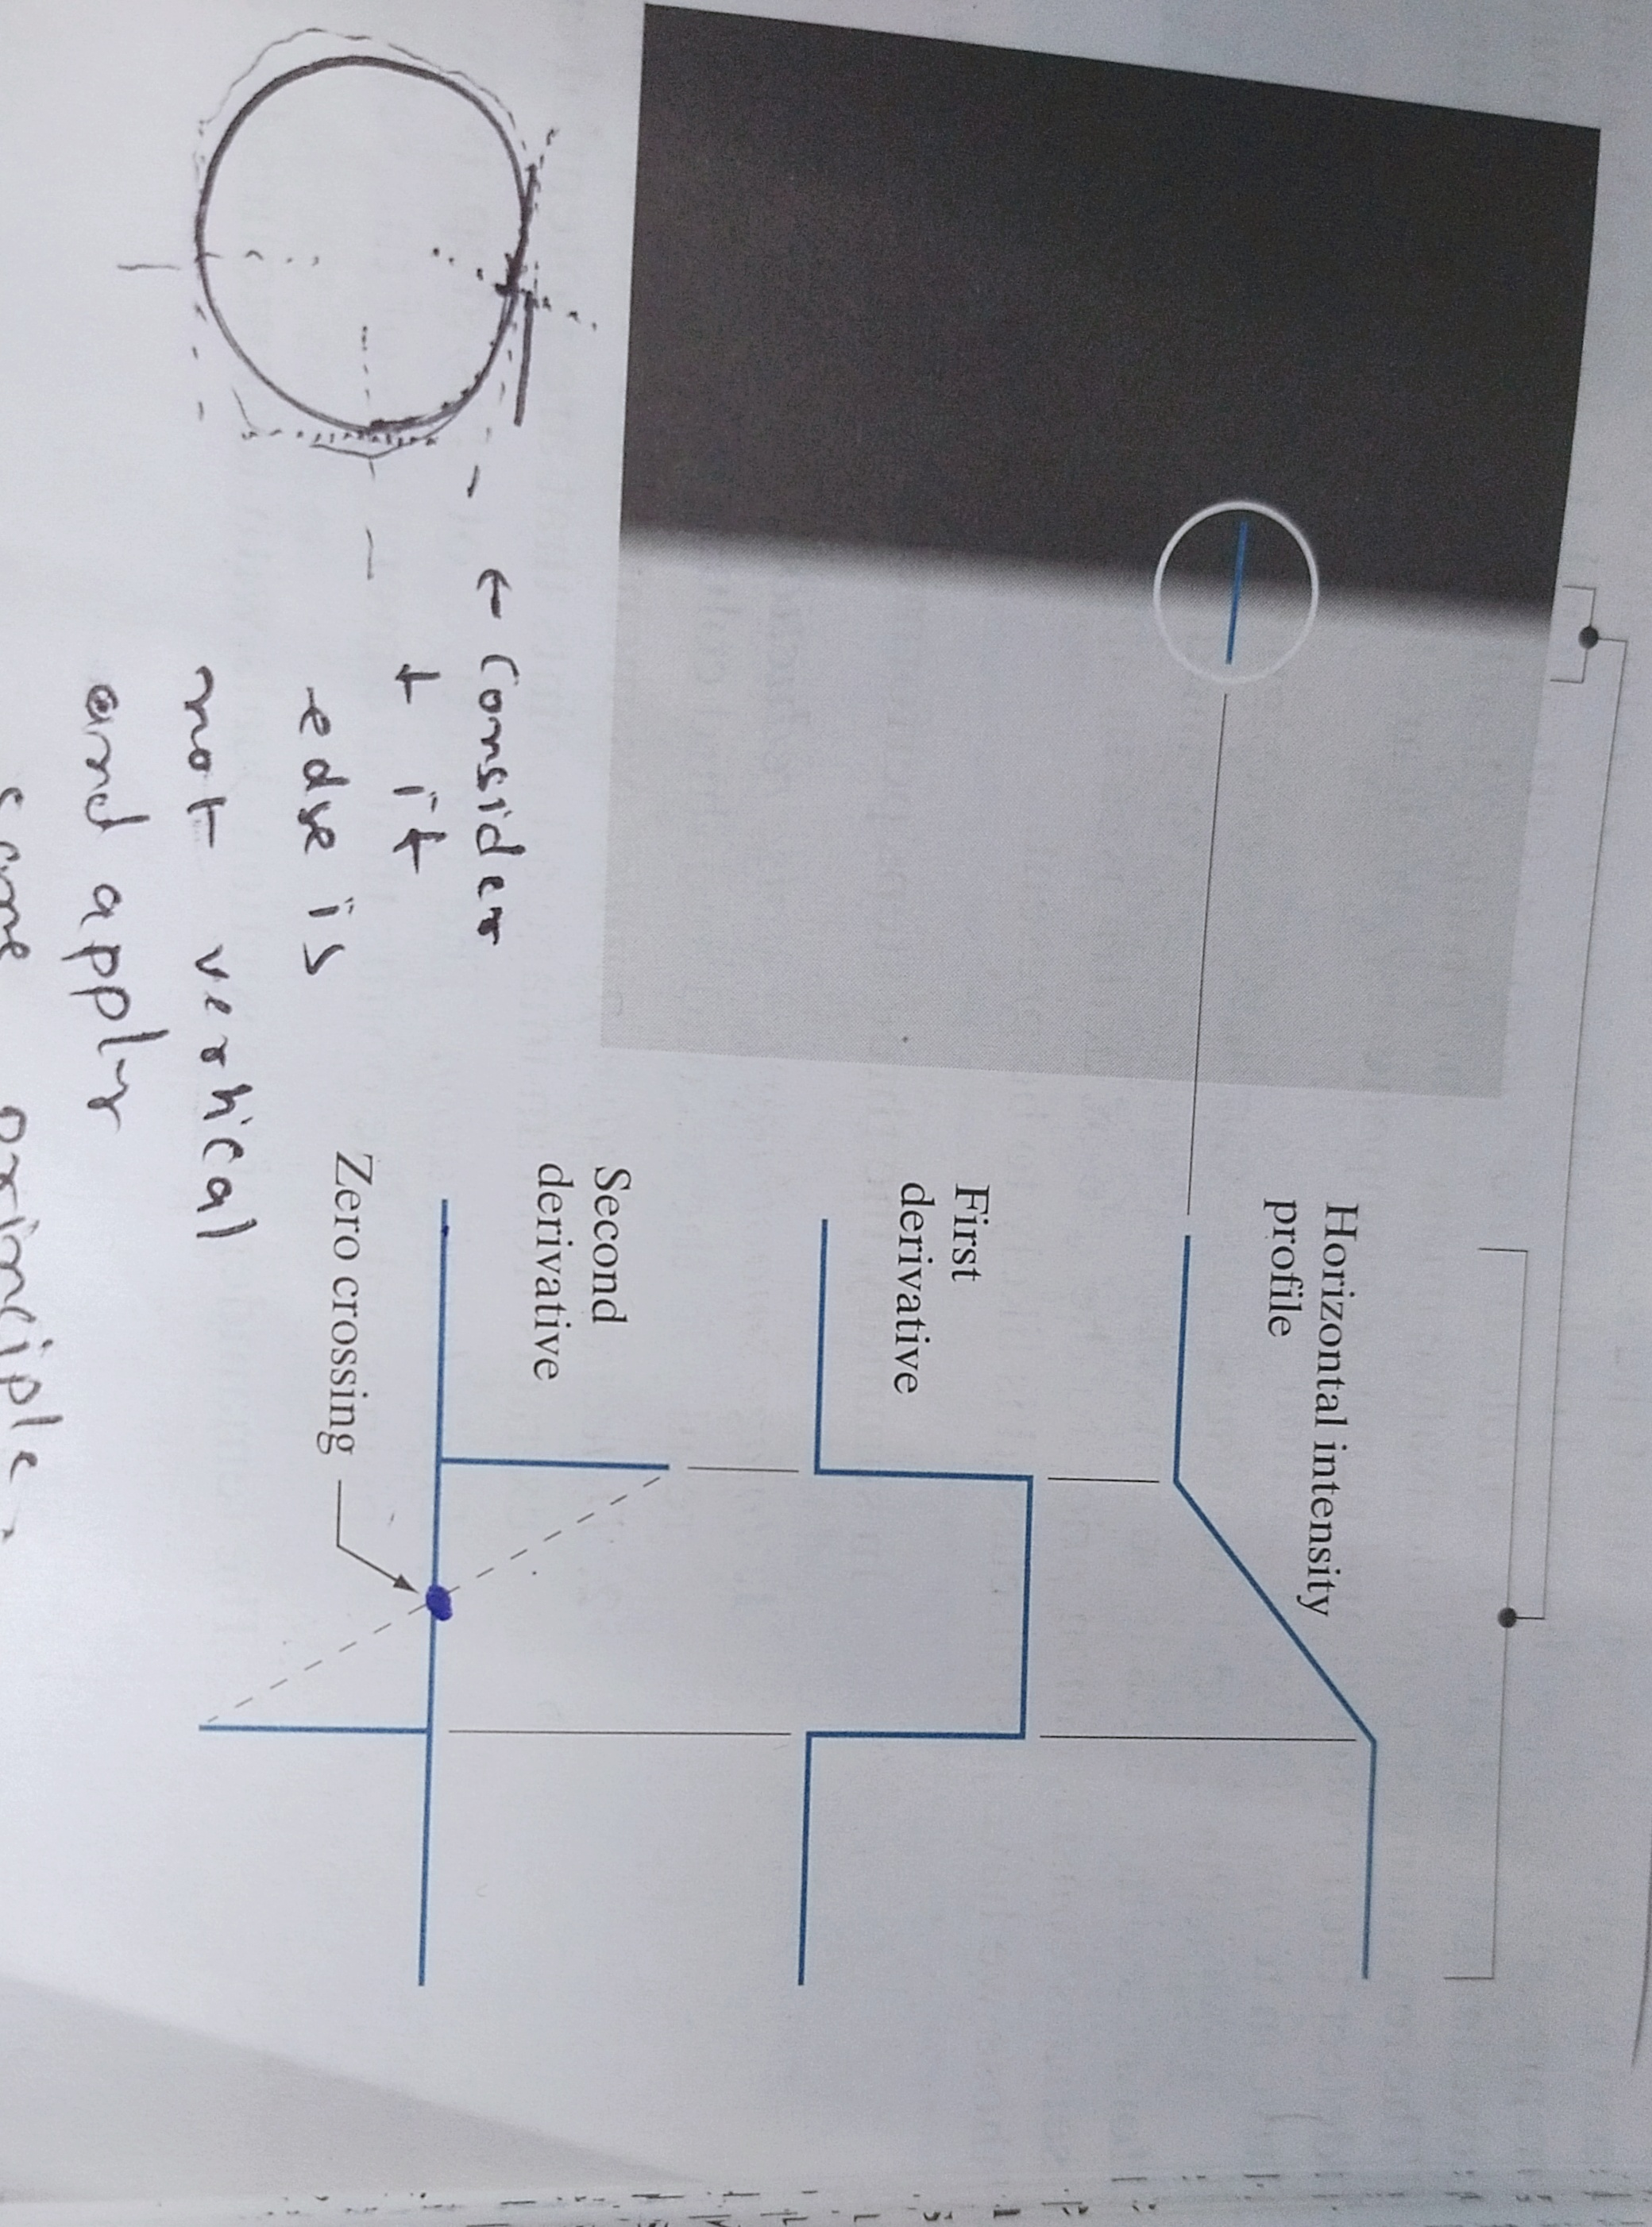

In [18]:
from IPython.display import Image
Image(filename='images/derivatives.jpg', width=400)

Points to be noted for first derivative of edge intensity functions:
<ol>
    <li>The first derivative of ramp portion is equal to the slope of the ramp line, so it remains constant throughout the ramp portion.</li>
    <li> The first derivative of the constant intensity levels is zero</li>

</ol>

Points to be noted for the second derivative of edge intensity functions:
<ol>
    <li>The second derivative is zero except for two points. These points are where the intensity transition takes place. It can be verified by taking the limits at these points, which is <br><br>
        $\large \begin{equation}
        \lim_{x \to P} \frac{f'(x + \delta x)\:-\:f'(x)}{\delta x}
        \end{equation}$<br></li>
    <br>
    <li>There is a point of zero crossing between the two peaks. This point can be used to find the center of the edge and to locate which edge pixels  lie close to the black region and which lie closer to whiter region. The function would look the opposite for white to black transition.</li>
    
</ol>

<br>
<b>Note:</b> For a circular edge shape, the similar derivative methodology can be applied by drawing a line perpendicular to the edge's surface and calculating the intensity function.

<h2> Effect of noise on edge detection </h2>

<ul>
    <li>With increasing noise, the intensity ramp is not affected that much but the derivative function becomes very disoriented, with random spikes appearing in place of smooth lines. This becomes worse if the standard deviation of gaussian noise keeps on increasing.</li>
    <li>Second order derivatives are more sensitive to noise. The negative and positive components of the second order derivatives become very difficult to detect even at a gaussian noise of 0.1 standard deviation.</li>
</ul>

<h2> Recommended steps for Edge Detection üë®‚Äçüéì</h2>

<ol>
    <li>Perform image smoothening for noise reduction.</li>
    <li>Detection of edge points. This means selection all potential edge point candidates.</li>
    <li>Edge localization. The objective is to select from candidate points only those points which truly are the member of the edge set. Set filtering in laymann terms.</li>
    </ol>

<h2> References </h2>

[1] Gonzalez, R. C., & Woods, R. E. (2002). Digital image processing. Chapter 10, pg. 710-714<br>
[2] Bradski, G. (2000). The OpenCV Library. Dr. Dobb&#x27;s Journal of Software Tools.<br>
